# Co trzeba zrealizować:
## Sieci MLP
1. Zaimportować potrzebne biblioteki
2. Wczytać odpowiedni zbiór danych
3. Wyuczyć model MLPclassifier dla wybranego zbioru danych przy domyślnych parametrach, podać dokładność rozpoznawania, obliczyć macierz pomyłek i odpowiednio ja wydrukować, wydrukować jak zmienia się funkcja straty w kolejnych krokach uczenia (epokach) 20 pkt
4. Wydrukować pierwszych pięć wzorców, dla których rozpoznawanie jest błędne. Przeanalizować dlaczego występują błędy 10 pkt 
5. Wydzielić zbiór walidujący (dev) ze zbioru testowego – liczność ok 1000 wzorców równomiernie dla każdej klasy. Wydrukować ile jest wzorców w każdej klasie w zbiorze walidującym. 10 pkt
6. Wydrukować krzywą uczenia (zależność funkcji straty od kolejnych epok lub paczek) dla zbioru uczącego i walidującego 20 pkt

RAZEM 60 pkt

## 1. Przygotowanie bibliotek i

In [1]:
# 1. Zaimportowane biblioteki

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

## 2. Wczytanie danych

In [2]:
# 2. a) Wczytanie danych

df_train = pd.read_csv("fashion-mnist_train.csv")
df_train.head()

df_test = pd.read_csv("fashion-mnist_test.csv")
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# 2. b) Wydzienie parametru klasy

y_train = df_train["label"]
y_test = df_test["label"]
print(y_train.head())

X_train = df_train.copy().drop(["label"], axis=1)
X_test = df_test.copy().drop(["label"], axis=1)
X_train.head()

0    2
1    9
2    6
3    0
4    3
Name: label, dtype: int64


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Analiza struktury zbioru

In [4]:
# Rozmiar zbioru (l. próbek, l. pixeli)

print(f"Training set: {df_train.shape}")
print(f"Testing set: {df_test.shape}")

Training set: (60000, 785)
Testing set: (10000, 785)


In [5]:
# Liczba próbek w każdej klasie

print(f"Training set: \n{y_train.value_counts().sort_index()}\n")
print(f"Testing set: \n{y_test.value_counts().sort_index()}\n")

Training set: 
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: label, dtype: int64

Testing set: 
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
Name: label, dtype: int64



In [6]:
# Podpisy klas

lables_dic = {0: "T-shirt/top",
              1: "Trouser",
              2: "Pullover",
              3: "Dress",
              4: "Coat",
              5: "Sandal",
              6: "Shirt",
              7: "Sneaker",
              8: "Bag",
              9: "Ankle boot"}

## Prezentacja przykładowych danych

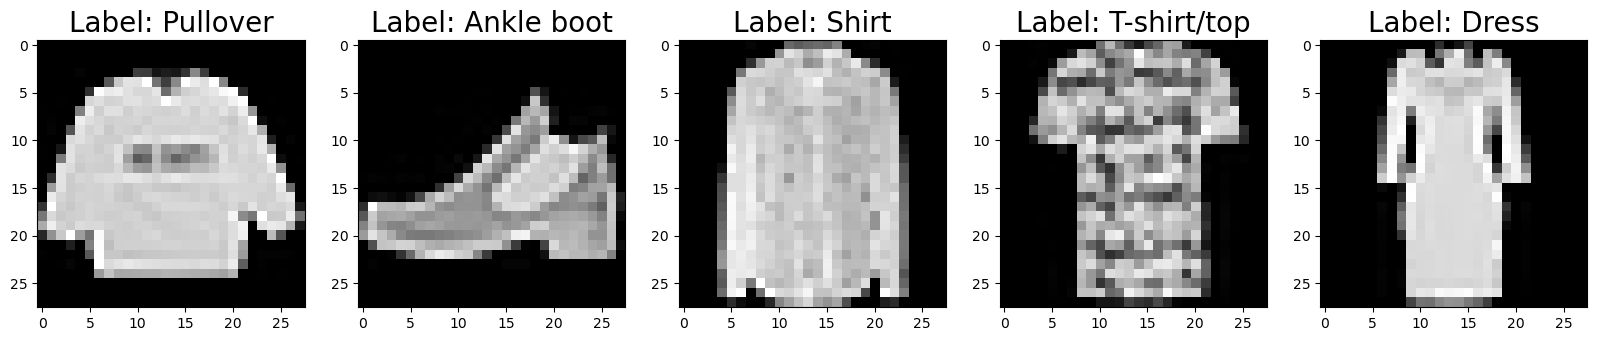

In [7]:
img_size = (28, 28)
plt.figure(figsize=(20, 4))
for i, (img, label) in enumerate(zip(X_train.values[0:5], y_train.values[0:5])):
    plt.subplot(1, 5, i+1)
    plt.imshow(np.reshape(img, img_size), cmap=plt.cm.gray)
    plt.title(f"Label: {lables_dic[label]}", fontsize=20)

## 3. Uczenie modelu

In [8]:
# 3. a) Uczenie modelu MLPClassifier

mlpc = MLPClassifier()

mlpc.fit(X_train, y_train)

MLPClassifier()

## Predykcja oraz dokładność rozpoznania

In [9]:
# 3. b) Predykcja oraz jej błąd / wynik

y_pred = mlpc.predict(X_test)

score = mlpc.score(X_test, y_test)
print(f"Accuracy of model (score): {score}")

Accuracy of model (score): 0.8578


## Macierz pomyłek

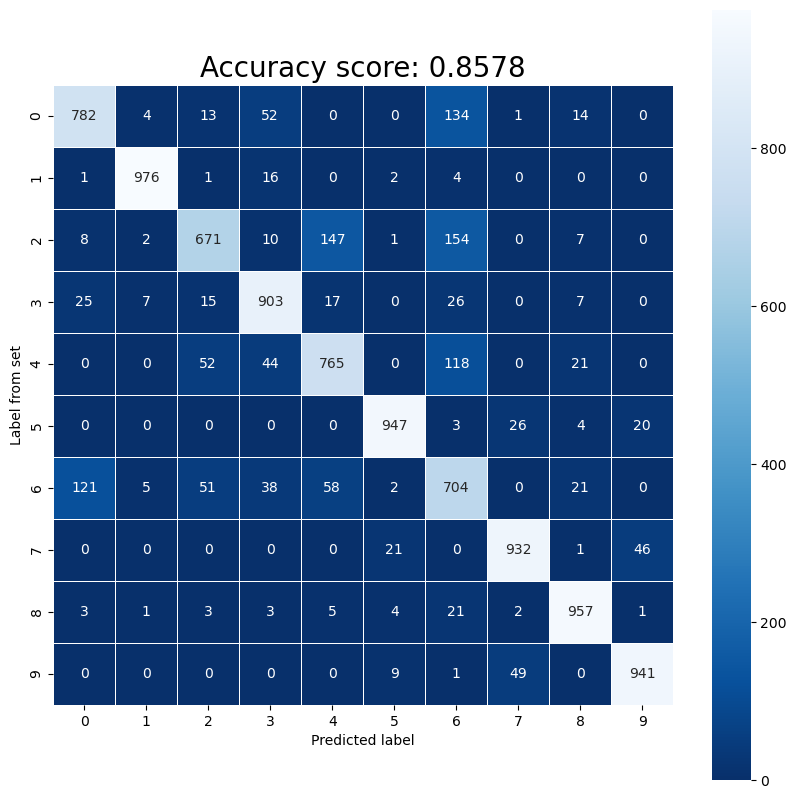

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


In [10]:
# 3. c) Macierz pomyłek w formie graficznej
def conf_matrix(title: str=''):
    cm = metrics.confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt="", linewidths=0.5,
               square=True, cmap="Blues_r")
    plt.ylabel("Label from set")
    plt.xlabel("Predicted label")
    plt.title(f"Accuracy score: {score}", size=20)
    plt.show()

    print(lables_dic)
    
    conf_matrix_list.append((title, cm))
    
# lista do analizy końcowej
conf_matrix_list = []    
conf_matrix("Default")

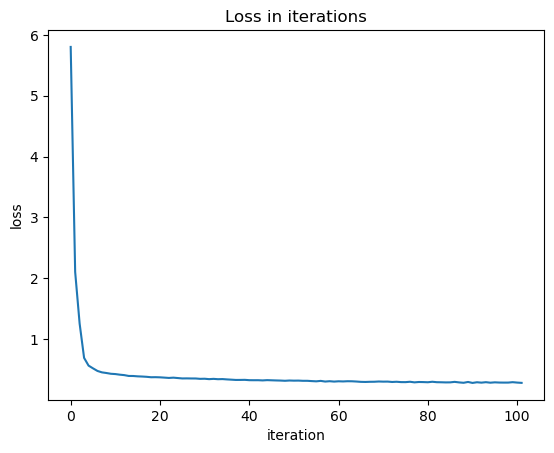

In [11]:
# 3. d) Funkcja straty w kolejnych krokach uczenia

def loss_curve(title: str=''):
    loss_in_iterations = mlpc.loss_curve_

    plt.plot(loss_in_iterations)
    plt.title("Loss in iterations")
    plt.xlabel("iteration")
    plt.ylabel("loss")
    plt.show()
    
    loss_curve_list.append((title, loss_in_iterations))
    
# lista do analizy końcowej
loss_curve_list = []
loss_curve("Default")

## 4. Błędnie rozpoznane wzorce

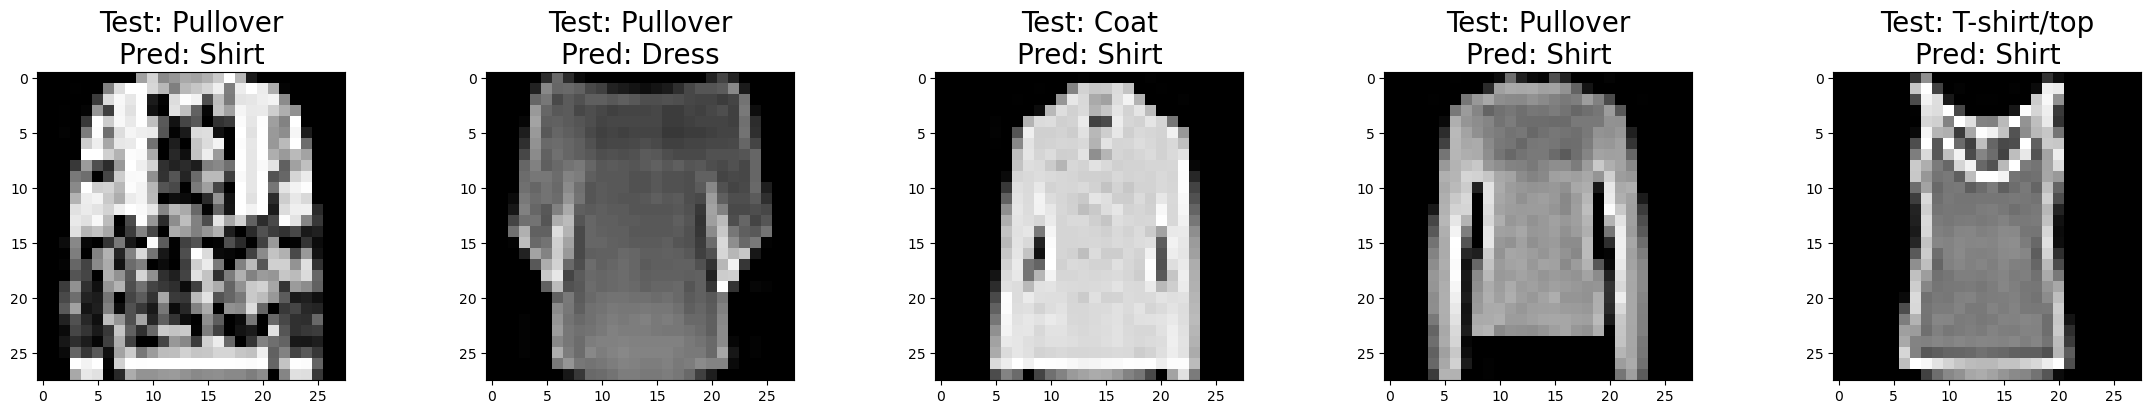

In [12]:
# 4. Pierwsze 5 błędnie rozpoznanych wzorców

disp_items = 5
plt.figure(figsize=(28, 4))

i = 0
for (img, test, pred) in zip(X_test.values, y_test.values, y_pred):
    if i >= disp_items:
        break
    if test == pred:
        continue
    plt.subplot(1, disp_items, i+1)
    plt.imshow(np.reshape(img, img_size), cmap=plt.cm.gray)
    plt.title(f"Test: {lables_dic[test]}\nPred: {lables_dic[pred]}", fontsize=20)
    i += 1
plt.show()

## 5. Zbiór walidujący

In [13]:
# 5. Wydzielenie zbioru walidujacego z testowego

dev_size = 1000
X_test2, X_dev, y_test2, y_dev = train_test_split(X_test, y_test, 
    test_size=dev_size, stratify=y_test)

# Liczba próbek w każdej klasie

print(f"Testing set: \n{y_test2.value_counts().sort_index()}\n")
print(f"Dev set: \n{y_dev.value_counts().sort_index()}\n")

Testing set: 
0    900
1    900
2    900
3    900
4    900
5    900
6    900
7    900
8    900
9    900
Name: label, dtype: int64

Dev set: 
0    100
1    100
2    100
3    100
4    100
5    100
6    100
7    100
8    100
9    100
Name: label, dtype: int64



## 6. Krzywe uczenia

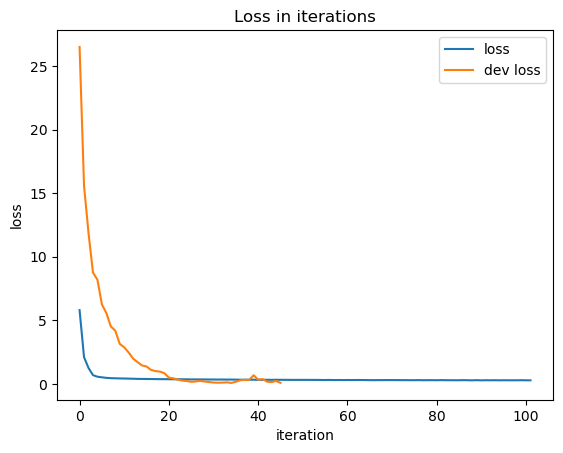

In [14]:
# 6. Krzywe uczenia dla zbioru uczącego oraz walidującego po iteracji

loss_in_iterations = mlpc.loss_curve_

mlpc.fit(X_dev, y_dev)
dev_loss_in_iterations = mlpc.loss_curve_

fig, ax = plt.subplots()
ax.plot(loss_in_iterations, label="loss")
ax.plot(dev_loss_in_iterations, label="dev loss")
plt.legend()
plt.title("Loss in iterations")
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()

## Dodatki do sprawozdania

## D. 3. Zmiana parametrów domyślych modelu

### A. Zmiana sposobu uczenia na SGD

Accuracy of model (score): 0.4677


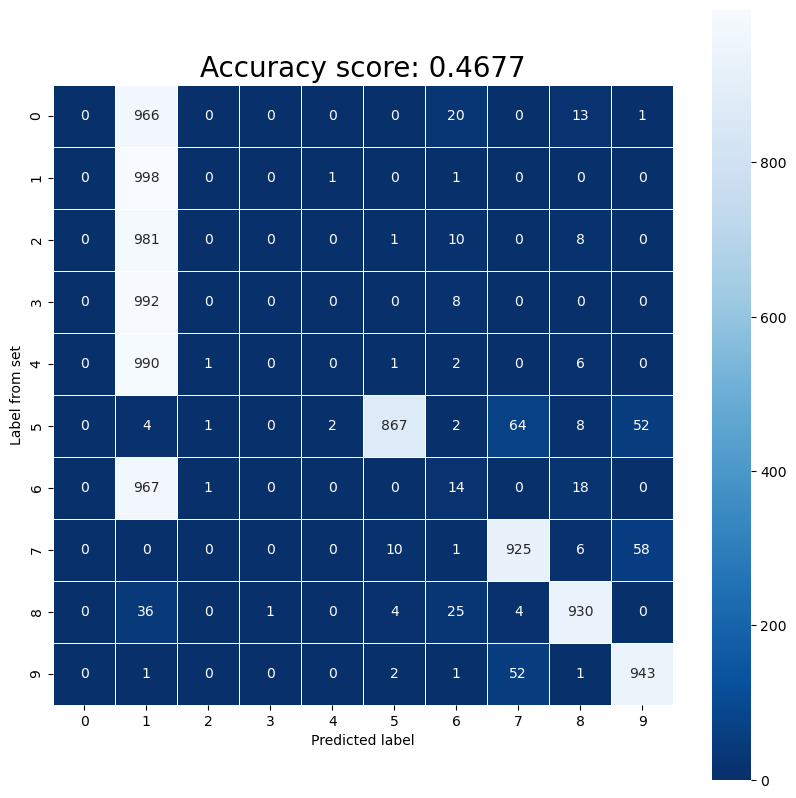

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


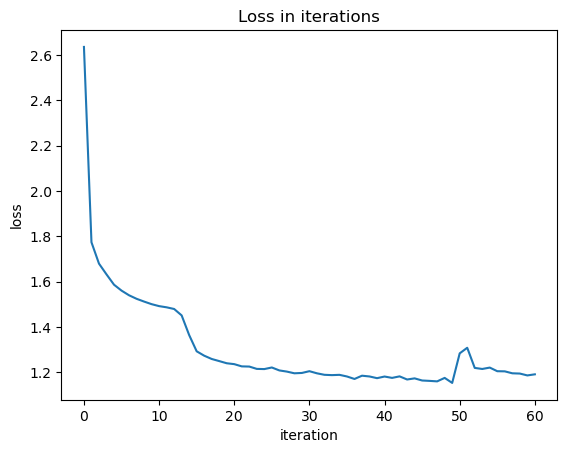

In [15]:
# A. Zmiana sposobu uczenia z Adam na SGD
# solver : {‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’

mlpc = MLPClassifier(solver="sgd")
mlpc.fit(X_train, y_train)

# Predykcja oraz dokładność

y_pred = mlpc.predict(X_test)
score = mlpc.score(X_test, y_test)
print(f"Accuracy of model (score): {score}")

# Macierz pomyłek

conf_matrix("SGD")

# Funkcja straty

loss_curve("SGD")

### B. Zmiana liczby neuronów

#### B.1. Na mniejszą

Accuracy of model (score): 0.6434


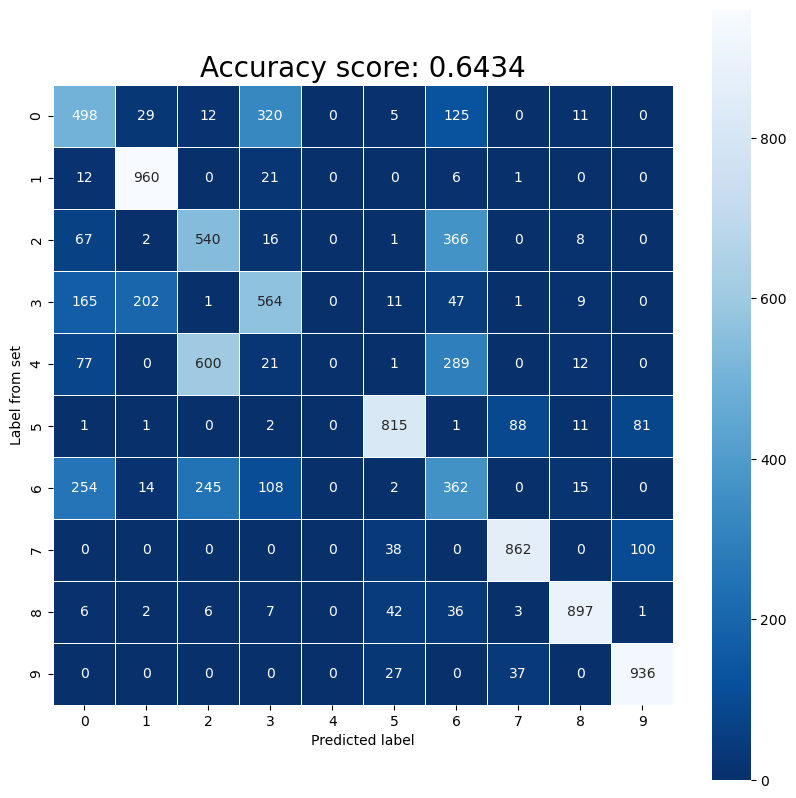

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


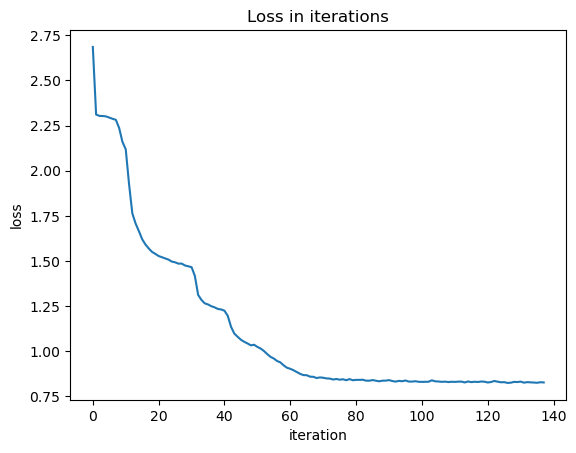

In [16]:
# B.1. Zmiana liczby neuronów w warstwie ukrytej na dużo mniejszą od domyślnej
# hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)

mlpc = MLPClassifier(hidden_layer_sizes=(10,))
mlpc.fit(X_train, y_train)

# Predykcja oraz dokładność

y_pred = mlpc.predict(X_test)
score = mlpc.score(X_test, y_test)
print(f"Accuracy of model (score): {score}")

# Macierz pomyłek

conf_matrix("10 neurons")

# Funkcja straty

loss_curve("10 neurons")

#### B.2. Na większą

Accuracy of model (score): 0.8737


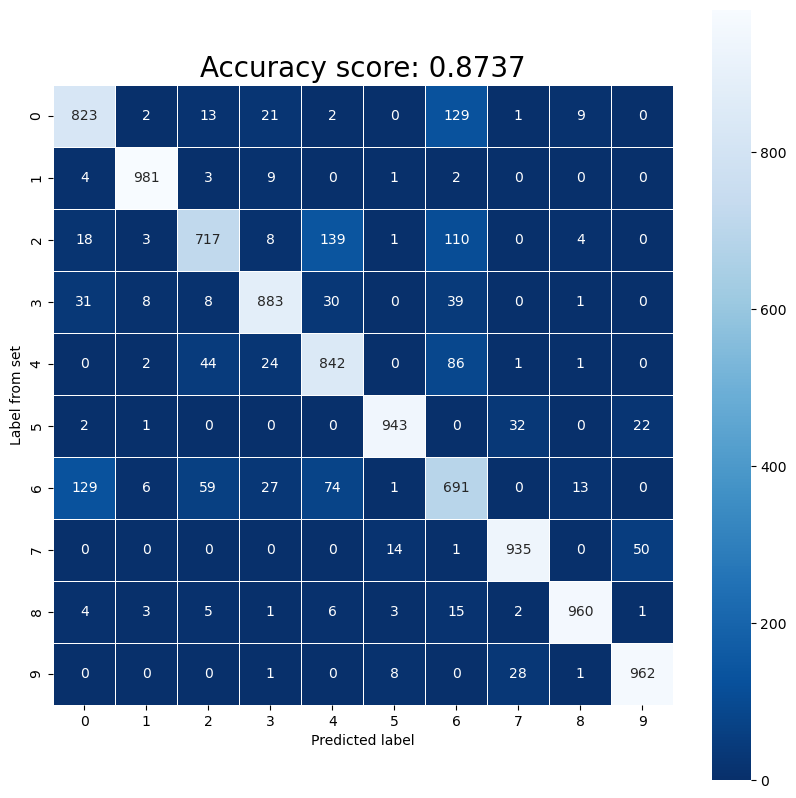

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


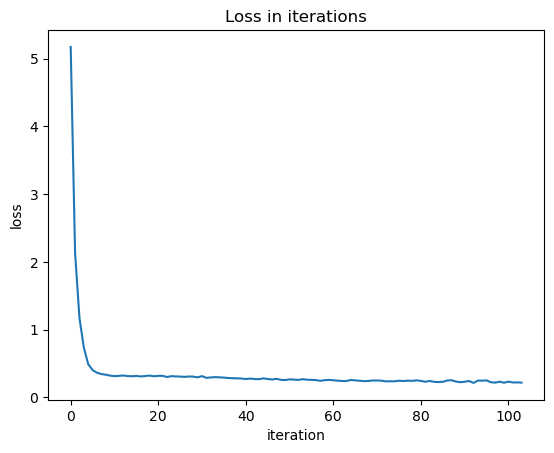

In [17]:
# B.2. Zmiana liczby neuronów w warstwie ukrytej na dużo większą od domyślnej
# hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)

mlpc = MLPClassifier(hidden_layer_sizes=(500,))
mlpc.fit(X_train, y_train)

# Predykcja oraz dokładność

y_pred = mlpc.predict(X_test)
score = mlpc.score(X_test, y_test)
print(f"Accuracy of model (score): {score}")

# Macierz pomyłek

conf_matrix("500 neurons")

# Funkcja straty

loss_curve("500 neurons")

### C. Włączenie momentum

Accuracy of model (score): 0.857


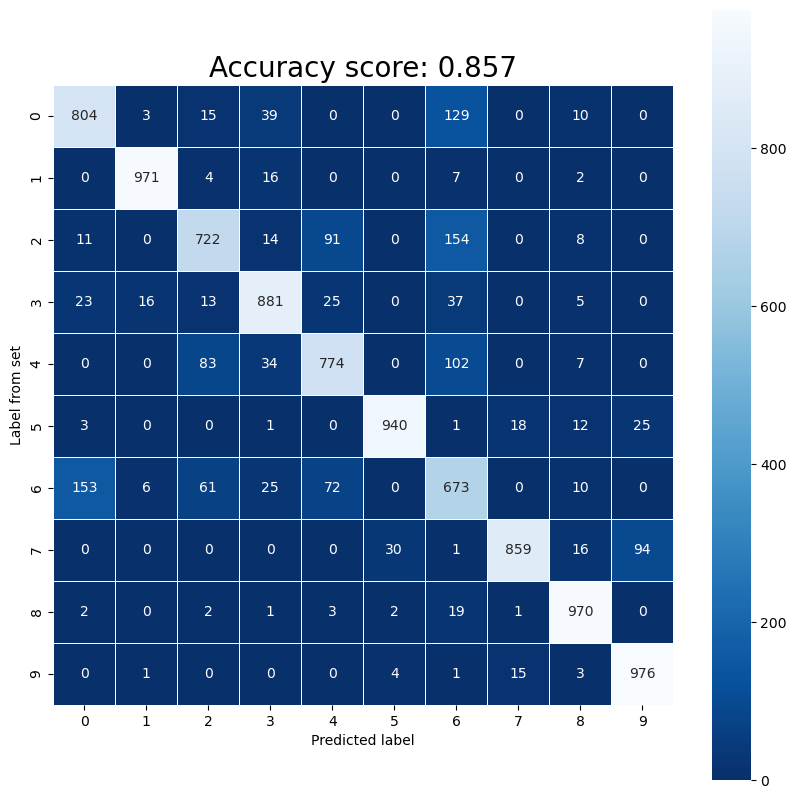

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


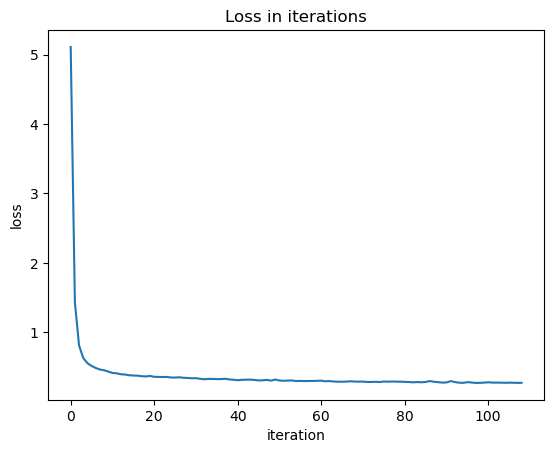

In [18]:
# C. Uwzględnienie momentum 
# solver : {‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
# hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)
# momentum : float, default=0.9 #! włączane tylko gdy SGD

mlpc = MLPClassifier(hidden_layer_sizes=(100,), momentum=0.9)
mlpc.fit(X_train, y_train)

# Predykcja oraz dokładność

y_pred = mlpc.predict(X_test)
score = mlpc.score(X_test, y_test)
print(f"Accuracy of model (score): {score}")

# Macierz pomyłek

conf_matrix("Momentum")

# Funkcja straty

loss_curve("Momentum")

### D. Zmiana iteracji

#### D.1. Na mniejszą

D:\Programs\ML Programs\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of model (score): 0.8611


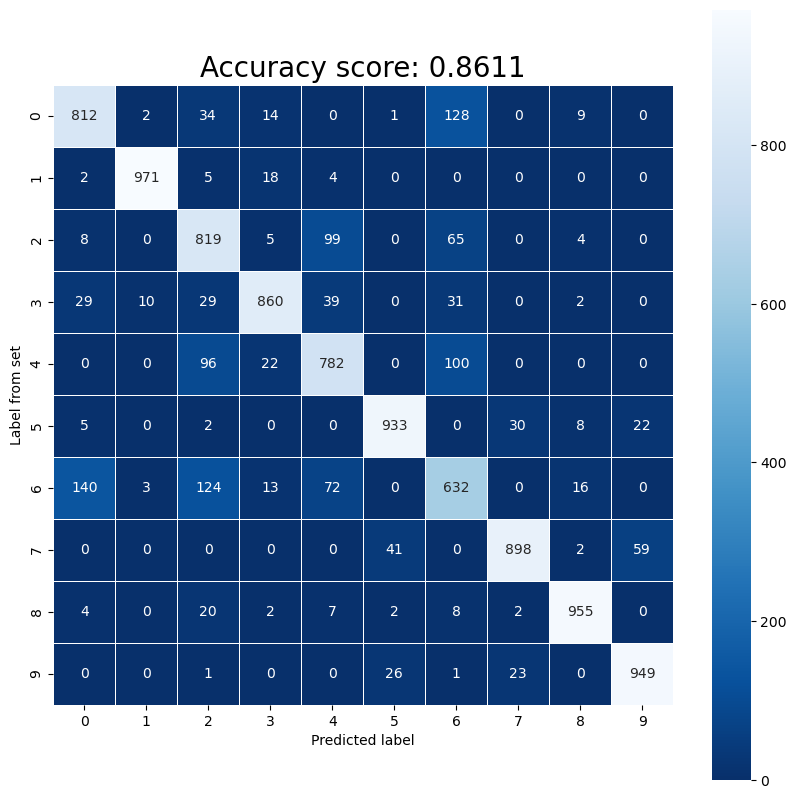

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


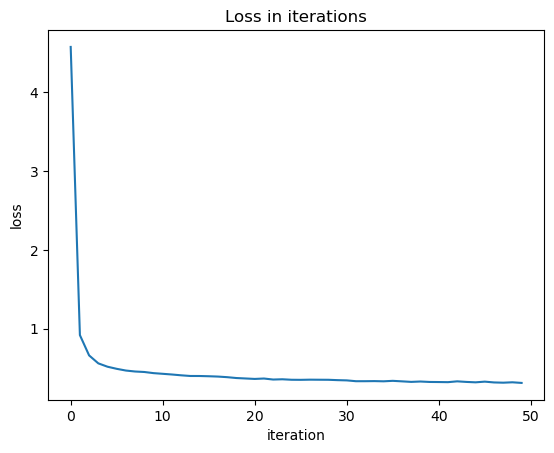

In [19]:
# D.1. Zmiana maksymalnej liczby iteracji na mniejszą od domyślnej
# max_iter : int, default=200

mlpc = MLPClassifier(max_iter=50)
mlpc.fit(X_train, y_train)

# Predykcja oraz dokładność

y_pred = mlpc.predict(X_test)
score = mlpc.score(X_test, y_test)
print(f"Accuracy of model (score): {score}")

# Macierz pomyłek

conf_matrix("50 iter")

# Funkcja straty

loss_curve("50 iter")

#### D.2. Na większą

Accuracy of model (score): 0.8591


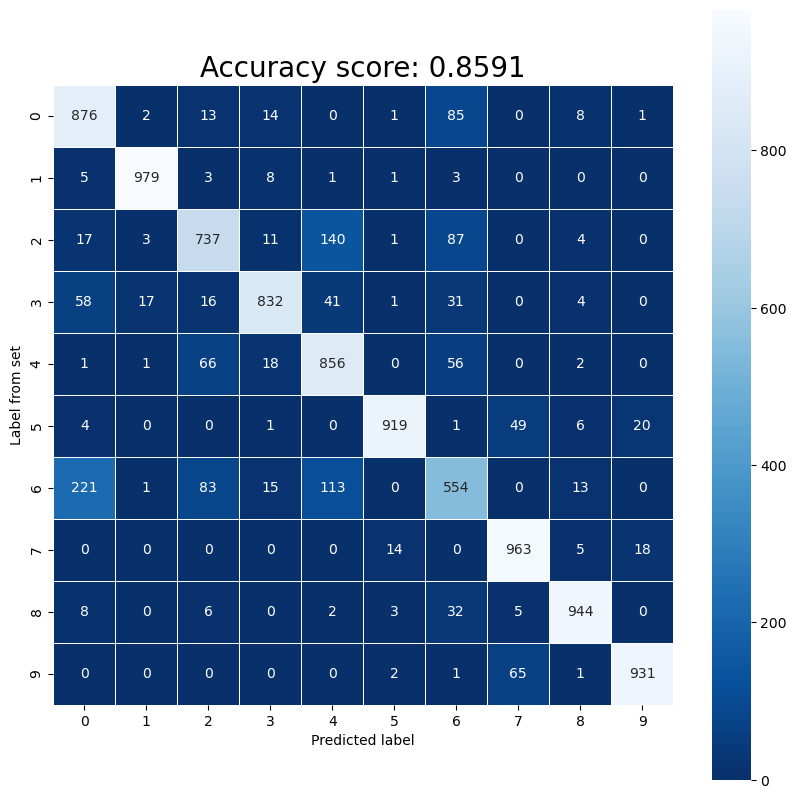

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


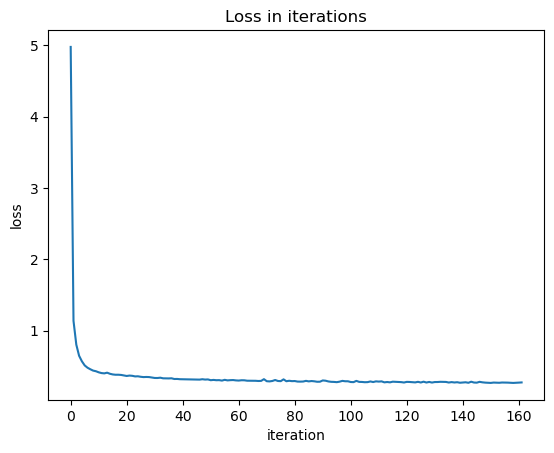

In [20]:
# D.2. Zmiana maksymalnej liczby iteracji na większą od domyślnej
# max_iter : int, default=200

mlpc = MLPClassifier(max_iter=450)
mlpc.fit(X_train, y_train)

# Predykcja oraz dokładność

y_pred = mlpc.predict(X_test)
score = mlpc.score(X_test, y_test)
print(f"Accuracy of model (score): {score}")

# Macierz pomyłek

conf_matrix("450 iter")

# Funkcja straty

loss_curve("450 iter")

### E. Włączenie wczesnego zatrzymania

Accuracy of model (score): 0.8578


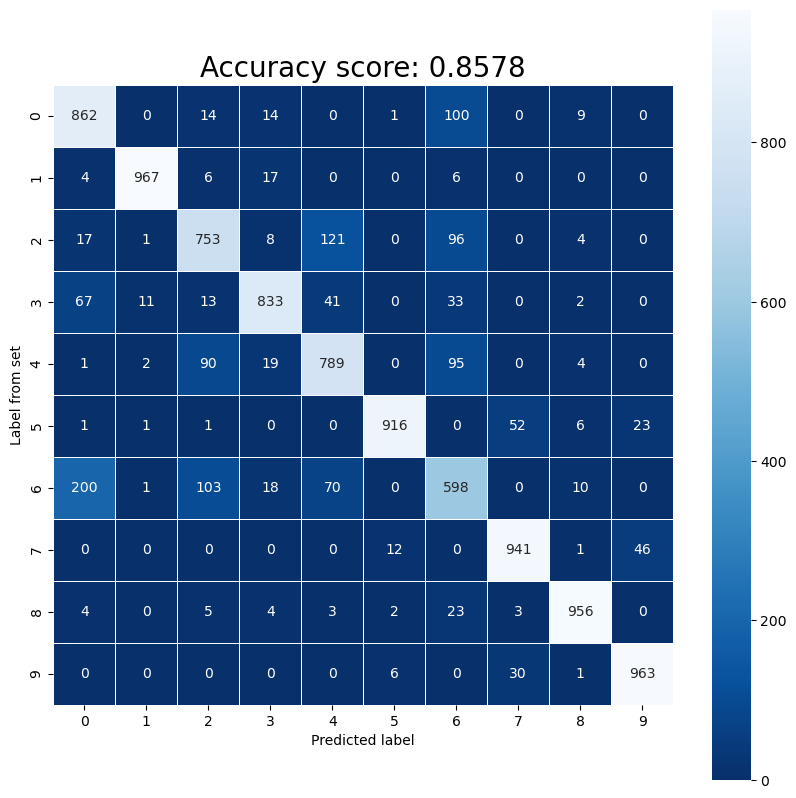

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


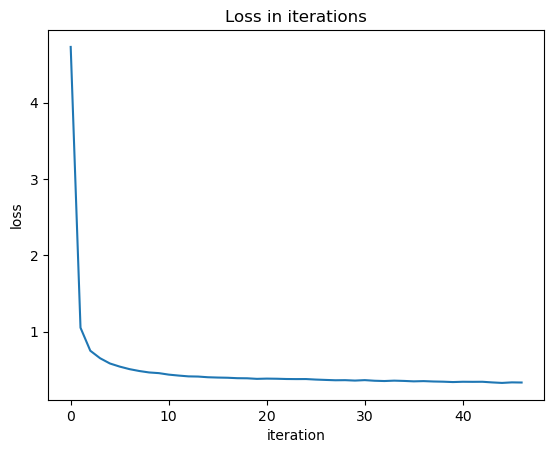

In [21]:
# E. Włączenie wczsnego zatrzymania
# early_stopping : bool, default=False #! tylko dla Adam lub SGD

mlpc = MLPClassifier(early_stopping=True)
mlpc.fit(X_train, y_train)

# Predykcja oraz dokładność

y_pred = mlpc.predict(X_test)
score = mlpc.score(X_test, y_test)
print(f"Accuracy of model (score): {score}")

# Macierz pomyłek

conf_matrix("Early stopping")

# Funkcja straty

loss_curve("Early stopping")

### F. Zmiana funkcji aktywacji

Accuracy of model (score): 0.7768


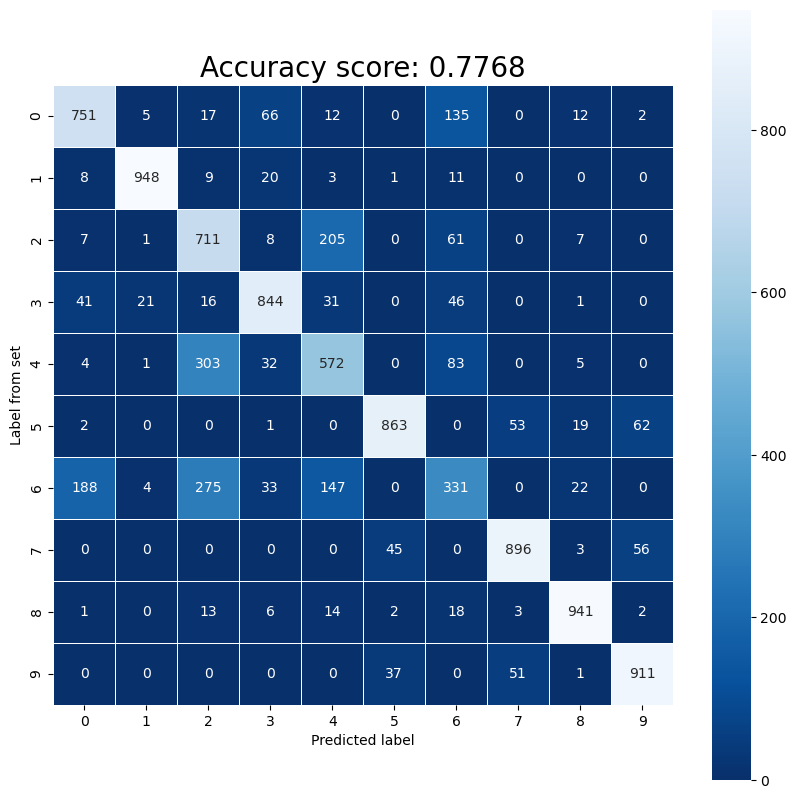

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


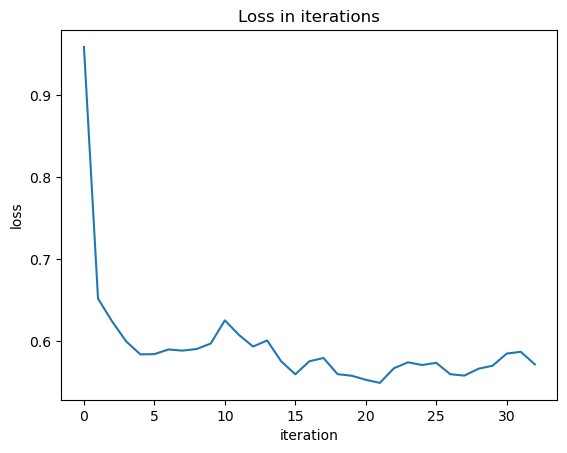

In [22]:
# F. Zmiana funkcji aktywacji na sigmoidalną
# activation : {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’

mlpc = MLPClassifier(activation="logistic")
mlpc.fit(X_train, y_train)

# Predykcja oraz dokładność

y_pred = mlpc.predict(X_test)
score = mlpc.score(X_test, y_test)
print(f"Accuracy of model (score): {score}")

# Macierz pomyłek

conf_matrix("A. func = logistic")

# Funkcja straty

loss_curve("A. func = logistic")

### Analiza

items: 9


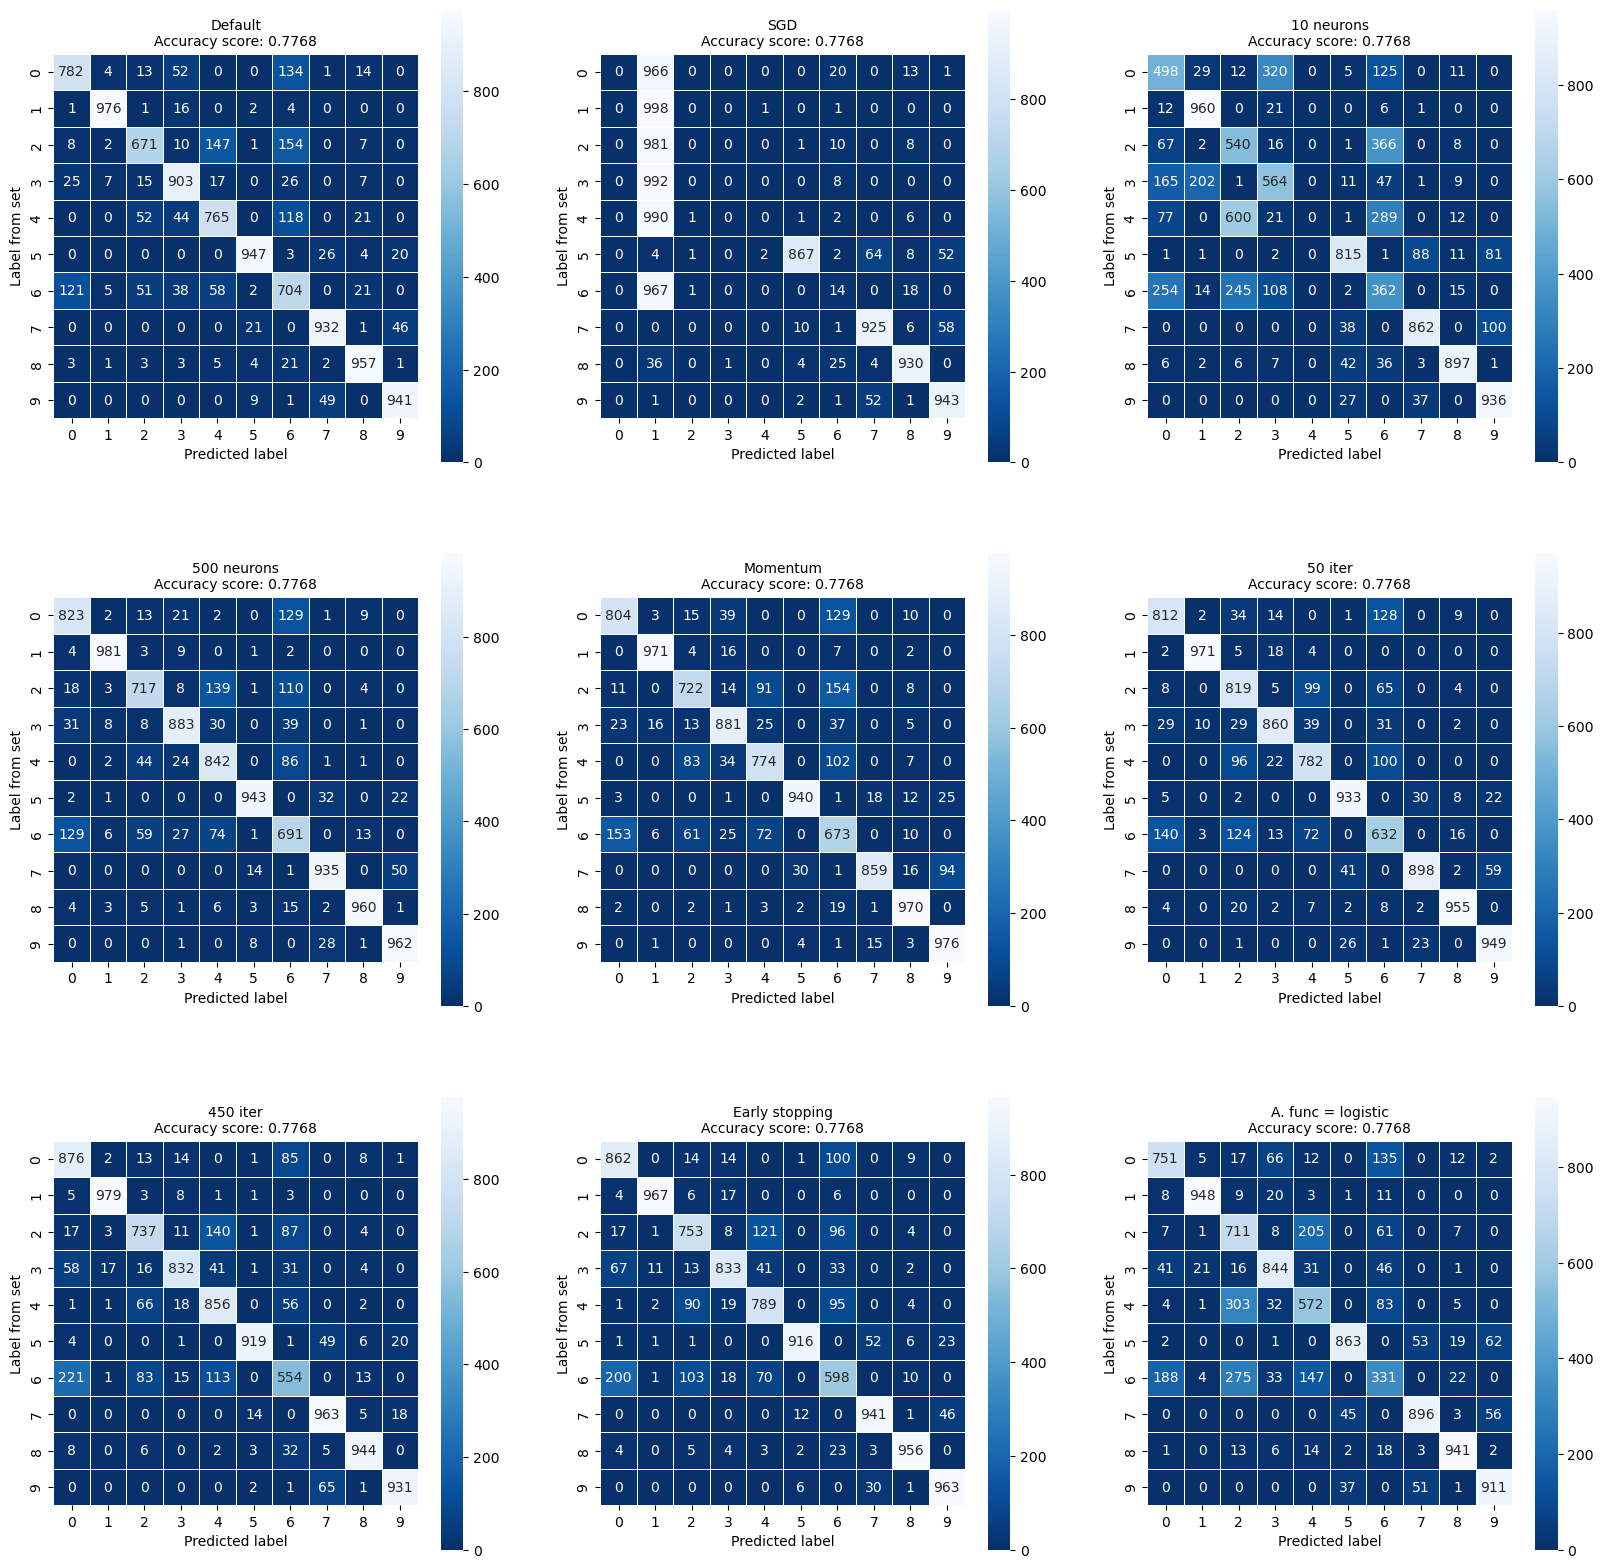

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


In [23]:
disp_items = len(conf_matrix_list)
print("items:", disp_items)
plt.figure(figsize=(20, 20))

for i, (label, cm) in enumerate(conf_matrix_list):
    plt.subplot(3, 3, i+1)
    sns.heatmap(cm, annot=True, fmt="", linewidths=0.5,
               square=True, cmap="Blues_r")
    plt.ylabel("Label from set")
    plt.xlabel("Predicted label")
    plt.title(f"{label}\nAccuracy score: {score}", size=10)

plt.show()
print(lables_dic)

items: 9


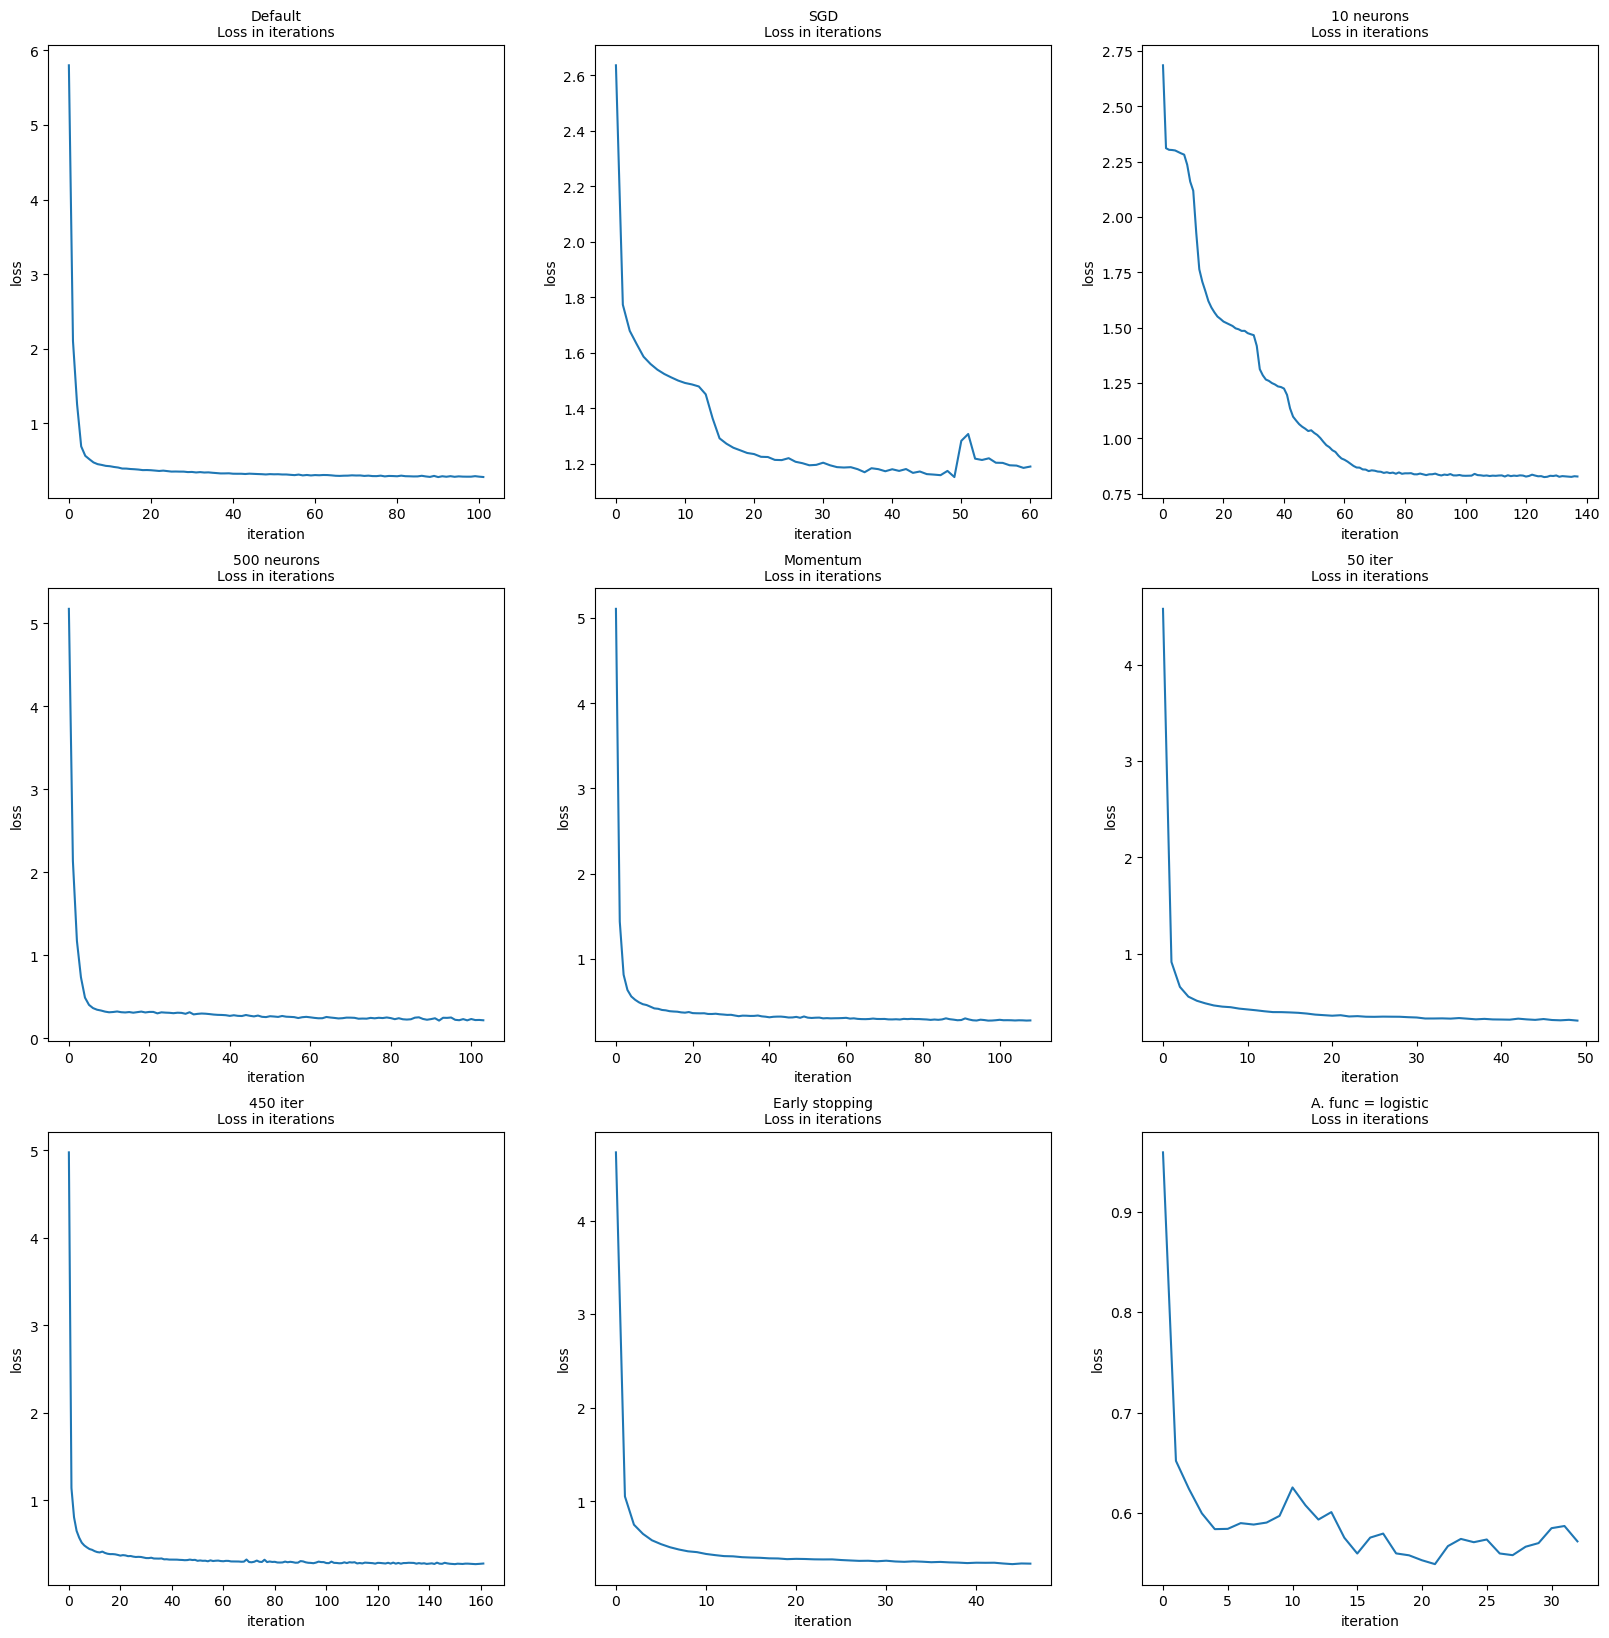

In [24]:
disp_items = len(loss_curve_list)
print("items:", disp_items)
plt.figure(figsize=(20, 20))

for i, (label, loss) in enumerate(loss_curve_list):
    plt.subplot(3, 3, i+1)
    plt.plot(loss)
    plt.title(f"{label}\nLoss in iterations", size=10)
    plt.xlabel("iteration")
    plt.ylabel("loss")

plt.show()